# Airbnb Looker Dashboard Project
In this project I prepare a dataset of Airbnb listing information, available [here](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata?resource=download&ref=hackernoon.com), for use in a Looker Studio dashboard.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Initial data exploration

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Airbnb_Open_Data.csv')

<ipython-input-3-95360a9aca16>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Airbnb_Open_Data.csv')


In [4]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

## Dropping columns

Let's begin by determining which columns we're going to keep and drop the others.

There are a few columns that won't be necessary for our analysis, including host information, country and country code (all data is from NYC), and some of the review information. License is all unnecessary.

In [6]:
df.drop(['id','host id', 'host_identity_verified','host name', 'country','country code','last review', 'reviews per month', 'calculated host listings count', 'house_rules','license'], axis=1,inplace=True)
df.head()

,NAME,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,availability 365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,4.0,286.0
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,4.0,228.0
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,5.0,352.0
3,NaN,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,4.0,322.0
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,3.0,289.0


In [7]:
df.nunique()

,0
NAME,61281
neighbourhood group,7
neighbourhood,224
lat,21991
long,17774
instant_bookable,2
cancellation_policy,3
room type,4
Construction year,20
price,1151


Since we already have a column for neighbourhood, we can get rid of the group column as it is likely too stratified for any practical use.




In [8]:
df.drop('neighbourhood', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   NAME                 102349 non-null  object 
 1   neighbourhood group  102570 non-null  object 
 2   lat                  102591 non-null  float64
 3   long                 102591 non-null  float64
 4   instant_bookable     102494 non-null  object 
 5   cancellation_policy  102523 non-null  object 
 6   room type            102599 non-null  object 
 7   Construction year    102385 non-null  float64
 8   price                102352 non-null  object 
 9   service fee          102326 non-null  object 
 10  minimum nights       102190 non-null  float64
 11  number of reviews    102416 non-null  float64
 12  review rate number   102273 non-null  float64
 13  availability 365     102151 non-null  float64
dtypes: float64(7), object(7)
memory usage: 11.0+ MB


## Data Cleaning
Let's now clean our chosen columns to get them ready for dashboarding.

First, by Python convention, we'll convert our column names to snake case.

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.rename(columns={'neighbourhood_group':'neighborhood_group'}, inplace=True)
df.columns

Index(['name', 'neighborhood_group', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews',
       'review_rate_number', 'availability_365'],
      dtype='object')

The column `instant_bookable` should actually be a boolean type so we'll quickly adjust that.

In [10]:
df['instant_bookable'] = df['instant_bookable'].astype(bool)
df['instant_bookable'].dtype

dtype('bool')

Next we'll combine our price and service fee columns into one column, `total_price`.

In [11]:
df['price'] = pd.to_numeric(df['price'].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')
df['service_fee'] = pd.to_numeric(df['service_fee'].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')

df['total_price'] = round(df['price'] + df['service_fee'],2)
df.drop(['price', 'service_fee'], axis=1, inplace=True)

Now to combine our latitutde and longitude into one column, `lat_long`.

In [12]:
df['lat_long'] = df['lat'].astype(str) + ', ' + df['long'].astype(str)
df.drop(['lat', 'long'], axis=1, inplace=True)

We have 7 neighborhood groups when in reality there are 5 in NYC. Let's take a closer look.

In [13]:
df['neighborhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [14]:
df['neighborhood_group'] = df['neighborhood_group'].replace('brookln', 'Brooklyn').replace('manhatan', 'Manhattan')
df['neighborhood_group'].value_counts()

,count
neighborhood_group,
Manhattan,43793
Brooklyn,41843
Queens,13267
Bronx,2712
Staten Island,955


In [15]:
df.head()

,name,neighborhood_group,instant_bookable,cancellation_policy,room_type,construction_year,minimum_nights,number_of_reviews,review_rate_number,availability_365,total_price,lat_long
0,Clean & quiet apt home by the park,Brooklyn,False,strict,Private room,2020.0,10.0,9.0,4.0,286.0,1159.0,"40.64749, -73.97237"
1,Skylit Midtown Castle,Manhattan,False,moderate,Entire home/apt,2007.0,30.0,45.0,4.0,228.0,170.0,"40.75362, -73.98377"
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,True,flexible,Private room,2005.0,3.0,0.0,5.0,352.0,744.0,"40.80902, -73.9419"
3,NaN,Brooklyn,True,moderate,Entire home/apt,2005.0,30.0,270.0,4.0,322.0,442.0,"40.68514, -73.95976"
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,False,moderate,Entire home/apt,2009.0,10.0,9.0,3.0,289.0,245.0,"40.79851, -73.94399"


## Data Wrangling
Let's look closer at our remaining columns.

In [16]:
df.describe()

,construction_year,minimum_nights,number_of_reviews,review_rate_number,availability_365,total_price
count,102385.000000,102190.000000,102416.000000,102273.000000,102151.000000,102113.000000
mean,2012.487464,8.135845,27.483743,3.279106,141.133254,750.226690
std,5.765556,30.553781,49.508954,1.284657,135.435024,397.983597
min,2003.000000,-1223.000000,0.000000,1.000000,-10.000000,60.000000
25%,2007.000000,2.000000,1.000000,2.000000,3.000000,408.000000
50%,2012.000000,3.000000,7.000000,3.000000,96.000000,749.000000
75%,2017.000000,5.000000,30.000000,4.000000,269.000000,1096.000000
max,2022.000000,5645.000000,1024.000000,5.000000,3677.000000,1440.000000


We have issues with three columns, `minimum_nights` (negative numbers), `number_of_reviews` (we don't want rows with zero reviews), and `availability_365` (numbers outside of 1-365 range are invalid).

Let's tackle each.

In [17]:
print(df['minimum_nights'].value_counts().sort_index())
print(df.shape[0])

minimum_nights
-1223.0    1
-365.0     1
-200.0     1
-125.0     1
-12.0      1
          ..
 1000.0    2
 1250.0    1
 2645.0    1
 3455.0    1
 5645.0    1
Name: count, Length: 153, dtype: int64
102599


Let's simply remove all data where mininum nights are below 1 and above 60.

In [18]:
df = df[(df['minimum_nights'] >= 1) & (df['minimum_nights'] <= 60)]
print(df.shape[0])

101428


We only lost around 1% of our data, so we can continue to `number_of_reviews`.

In [19]:
df['number_of_reviews'].value_counts().sort_index()

,count
number_of_reviews,
0.0,15405
1.0,10293
2.0,7086
3.0,5335
4.0,4093
...,...
849.0,1
884.0,1
966.0,1


We saw the 75th percentile of reviews at 30, so in addition to removing the rows with 0, we'll arbitrarily remove all rows with over 50 reviews.

In [20]:
df = df[(df['number_of_reviews'] > 0) & (df['number_of_reviews'] <= 50)]
df.shape[0]

68466

Finally let's handle availability.

Let's first determine the percentage of rows with invalid data (outside 1-365 range).

In [21]:
total_rows = len(df)

invalid_rows = df[(df['availability_365'] < 1) | (df['availability_365'] > 365)].shape[0]

percentage_invalid = (invalid_rows / total_rows) * 100

percentage_invalid


27.790436128881492

Nearly 28% of the data is invalid. Let's create a kernel density estimate (kde) plot to get an idea about our remaining data.









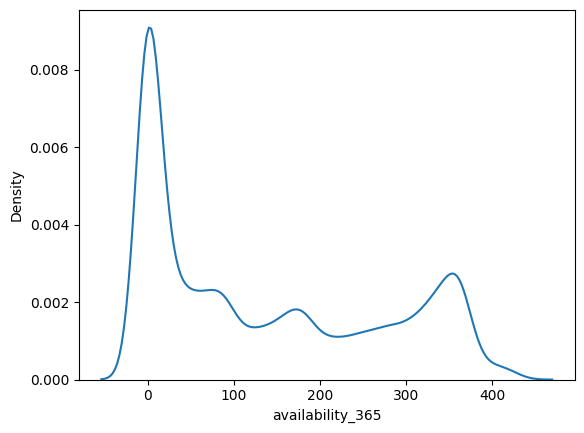

In [22]:
sns.kdeplot(data=df, x='availability_365')
plt.show()

In [23]:
total_rows = len(df)

quarter_avail = df[(df['availability_365'] >= 90) & (df['availability_365'] <= 365)].shape[0]

percentage_quarter = (quarter_avail / total_rows) * 100

percentage_quarter

46.85245231209652

To simplify things let's settle on listings available for at least 90 days out of the year. The listings that don't fit that criteria do not belong in our analysis, and we'll still have around 47% of our data remaining.

In [24]:
df = df[(df['availability_365'] >= 90) & (df['availability_365'] <= 365)]
df.shape[0]

32078

In [25]:
df.head()

,name,neighborhood_group,instant_bookable,cancellation_policy,room_type,construction_year,minimum_nights,number_of_reviews,review_rate_number,availability_365,total_price,lat_long
0,Clean & quiet apt home by the park,Brooklyn,False,strict,Private room,2020.0,10.0,9.0,4.0,286.0,1159.0,"40.64749, -73.97237"
1,Skylit Midtown Castle,Manhattan,False,moderate,Entire home/apt,2007.0,30.0,45.0,4.0,228.0,170.0,"40.75362, -73.98377"
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,False,moderate,Entire home/apt,2009.0,10.0,9.0,3.0,289.0,245.0,"40.79851, -73.94399"
6,BlissArtsSpace!,Brooklyn,False,moderate,Private room,2015.0,45.0,49.0,5.0,224.0,85.0,"40.68688, -73.95596"
7,BlissArtsSpace!,Brooklyn,False,moderate,Private room,2009.0,45.0,49.0,5.0,219.0,1272.0,"40.68688, -73.95596"


The data looks good, but the last thing I'd like to do is transform `construction_year` to a categorical type.

In [26]:
df['construction_year'].value_counts().sort_index()

,count
construction_year,
2003.0,1569
2004.0,1639
2005.0,1633
2006.0,1699
2007.0,1577
2008.0,1706
2009.0,1552
2010.0,1682
2011.0,1580


In [27]:
bins = [2002, 2007, 2012, 2017, 2022]

labels = ['2003-2007', '2008-2012', '2013-2017', '2018-2022']

df = df.copy()

df['construction_year_group'] = pd.cut(df['construction_year'], bins=bins, labels=labels, include_lowest=True)

print(df[['construction_year','construction_year_group']].head())

   construction_year construction_year_group
0             2020.0               2018-2022
1             2007.0               2003-2007
4             2009.0               2008-2012
6             2015.0               2013-2017
7             2009.0               2008-2012


In [28]:
df.head()

,name,neighborhood_group,instant_bookable,cancellation_policy,room_type,construction_year,minimum_nights,number_of_reviews,review_rate_number,availability_365,total_price,lat_long,construction_year_group
0,Clean & quiet apt home by the park,Brooklyn,False,strict,Private room,2020.0,10.0,9.0,4.0,286.0,1159.0,"40.64749, -73.97237",2018-2022
1,Skylit Midtown Castle,Manhattan,False,moderate,Entire home/apt,2007.0,30.0,45.0,4.0,228.0,170.0,"40.75362, -73.98377",2003-2007
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,False,moderate,Entire home/apt,2009.0,10.0,9.0,3.0,289.0,245.0,"40.79851, -73.94399",2008-2012
6,BlissArtsSpace!,Brooklyn,False,moderate,Private room,2015.0,45.0,49.0,5.0,224.0,85.0,"40.68688, -73.95596",2013-2017
7,BlissArtsSpace!,Brooklyn,False,moderate,Private room,2009.0,45.0,49.0,5.0,219.0,1272.0,"40.68688, -73.95596",2008-2012


We can now drop our original `construction_year` column.

In [29]:
df.drop('construction_year', axis=1, inplace=True)

## Saving cleaned dataframe as CSV
Finally, let's order our columns for ease of use, and save the cleaned dataframe as a csv.

In [30]:
df = df[['name', 'neighborhood_group', 'room_type',
         'instant_bookable', 'cancellation_policy',
         'minimum_nights', 'availability_365', 'construction_year_group',
         'number_of_reviews', 'review_rate_number',
         'lat_long','total_price']]
df.head()

,name,neighborhood_group,room_type,instant_bookable,cancellation_policy,minimum_nights,availability_365,construction_year_group,number_of_reviews,review_rate_number,lat_long,total_price
0,Clean & quiet apt home by the park,Brooklyn,Private room,False,strict,10.0,286.0,2018-2022,9.0,4.0,"40.64749, -73.97237",1159.0
1,Skylit Midtown Castle,Manhattan,Entire home/apt,False,moderate,30.0,228.0,2003-2007,45.0,4.0,"40.75362, -73.98377",170.0
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,Entire home/apt,False,moderate,10.0,289.0,2008-2012,9.0,3.0,"40.79851, -73.94399",245.0
6,BlissArtsSpace!,Brooklyn,Private room,False,moderate,45.0,224.0,2013-2017,49.0,5.0,"40.68688, -73.95596",85.0
7,BlissArtsSpace!,Brooklyn,Private room,False,moderate,45.0,219.0,2008-2012,49.0,5.0,"40.68688, -73.95596",1272.0


Now that our data is completed to our liking, let's drop any other rows with NA data we missed.

In [31]:
df.isna().sum()

,0
name,61
neighborhood_group,5
room_type,0
instant_bookable,0
cancellation_policy,15
minimum_nights,0
availability_365,0
construction_year_group,52
number_of_reviews,0
review_rate_number,108


In [32]:
df_clean = df.dropna()
df_clean.isna().sum()

,0
name,0
neighborhood_group,0
room_type,0
instant_bookable,0
cancellation_policy,0
minimum_nights,0
availability_365,0
construction_year_group,0
number_of_reviews,0
review_rate_number,0


In [33]:
df.shape

(32078, 12)

We're left with a little over 32,000 rows and 12 columns.

In [34]:
df_clean.to_csv('/content/drive/MyDrive/airbnb_cleaned_final.csv', index=False)